In [1]:
# Import required dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configure matplotlib
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1(np.linspace(0, 1, 10)))

In [2]:
# load the trace data
trace_df = pd.read_csv("../traces/conv_context_tokens_hist.csv")

# prefill throughput
true_prefill_throughput_df = pd.read_csv("../data/scratch/true_prefill_throughput.csv")
model_prefill_throughput_df = pd.read_csv("../data/scratch/model_prefill_throughput.csv")

# decode throughput
true_decode_throughput_df = pd.read_csv("../data/scratch/true_decode_throughput.csv")
model_decode_throughput_df = pd.read_csv("../data/scratch/model_decode_throughput.csv")

# calculate bin width for both prefill and decode throughput
bin_width = model_prefill_throughput_df["Sequence"][1] - model_prefill_throughput_df["Sequence"][0]

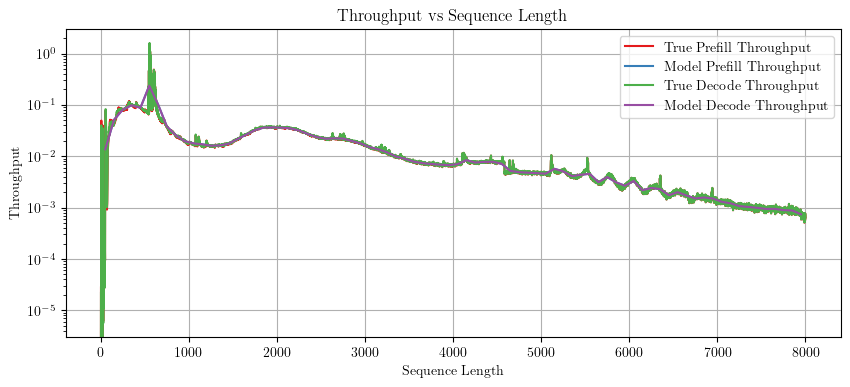

In [3]:
# plot the prefill and decode benchmarks
plt.figure(figsize=(10, 4))
plt.plot(true_prefill_throughput_df["Sequence"], true_prefill_throughput_df["Throughput"], label="True Prefill Throughput")
plt.plot(model_prefill_throughput_df["Sequence"], model_prefill_throughput_df["Throughput"] / bin_width, label="Model Prefill Throughput")
plt.plot(true_decode_throughput_df["Sequence"], true_decode_throughput_df["Throughput"], label="True Decode Throughput")
plt.plot(model_decode_throughput_df["Sequence"], model_decode_throughput_df["Throughput"] / bin_width, label="Model Decode Throughput")
plt.xlabel("Sequence Length")
plt.ylabel("Throughput")
plt.title("Throughput vs Sequence Length")
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

Length of model throughput dataframe: 8000
Length of true throughput dataframe: 8000


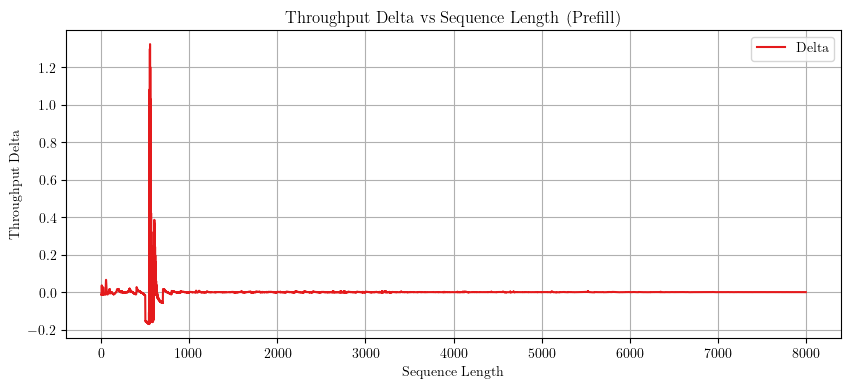

In [4]:
# plot the delta between the true and model prefill throughput

# Interpolate the model throughput values for the missing sequence lengths
model_prefill_throughput_df["seq_range"] = model_prefill_throughput_df["Sequence"].apply(lambda mid: list(range(mid - bin_width // 2, mid + bin_width // 2)))
model_prefill_throughput_df_expanded = model_prefill_throughput_df.explode("seq_range").rename(columns={"seq_range": "SequenceMid"})
model_prefill_throughput_df_expanded["Throughput"] = model_prefill_throughput_df_expanded["Throughput"] / bin_width
model_prefill_throughput_df_expanded = model_prefill_throughput_df_expanded[["SequenceMid", "Throughput"]]

# print the length of the model throughput dataframe
print(f"Length of model throughput dataframe: {len(model_prefill_throughput_df_expanded["Throughput"])}")
print(f"Length of true throughput dataframe: {len(true_prefill_throughput_df["Throughput"])}")

# calculate the delta between the two dataframes (using numpy arrays)
true_prefill_throughput_array = true_prefill_throughput_df["Throughput"].to_numpy()
model_prefill_throughput_array = model_prefill_throughput_df_expanded["Throughput"].to_numpy()

# Ensure both arrays have the same shape by truncating the longer array
prefill_min_length = min(len(true_prefill_throughput_array), len(model_prefill_throughput_array))
prefill_true_throughput_array = true_prefill_throughput_array[:prefill_min_length]
prefill_model_throughput_array = model_prefill_throughput_array[:prefill_min_length]

# Calculate the delta
prefill_throughput_delta_array = prefill_true_throughput_array - prefill_model_throughput_array

# plot the delta between the two dataframes
plt.figure(figsize=(10, 4))
plt.plot(model_prefill_throughput_df_expanded["SequenceMid"], prefill_throughput_delta_array, label="Delta")
plt.xlabel("Sequence Length")
plt.ylabel("Throughput Delta")
plt.title("Throughput Delta vs Sequence Length (Prefill)")
plt.legend()
plt.grid()
plt.show()

Length of model decode throughput dataframe: 8000
Length of true decode throughput dataframe: 8000


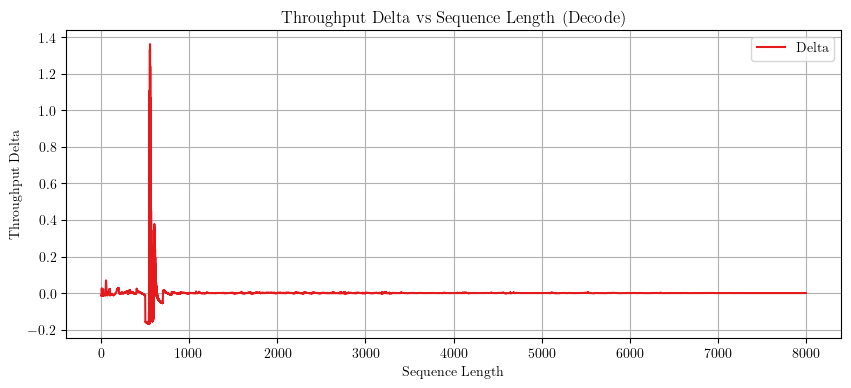

In [5]:
# plot the delta between the true and model prefill throughput

# Interpolate the model decode throughput values for the missing sequence lengths
model_decode_throughput_df["seq_range"] = model_decode_throughput_df["Sequence"].apply(lambda mid: list(range(mid - bin_width // 2, mid + bin_width // 2)))
model_decode_throughput_df_expanded = model_decode_throughput_df.explode("seq_range").rename(columns={"seq_range": "SequenceMid"})
model_decode_throughput_df_expanded["Throughput"] = model_decode_throughput_df_expanded["Throughput"] / bin_width
model_decode_throughput_df_expanded = model_decode_throughput_df_expanded[["SequenceMid", "Throughput"]]

# print the length of the model throughput dataframe
print(f"Length of model decode throughput dataframe: {len(model_decode_throughput_df_expanded["Throughput"])}")
print(f"Length of true decode throughput dataframe: {len(true_decode_throughput_df["Throughput"])}")

# calculate the delta between the two dataframes (using numpy arrays)
true_decode_throughput_array = true_decode_throughput_df["Throughput"].to_numpy()
model_decode_throughput_array = model_decode_throughput_df_expanded["Throughput"].to_numpy()

# Ensure both arrays have the same shape by truncating the longer array
decode_min_length = min(len(true_decode_throughput_array), len(model_decode_throughput_array))
decode_true_throughput_array = true_decode_throughput_array[:decode_min_length]
decode_model_throughput_array = model_decode_throughput_array[:decode_min_length]

# Calculate the delta
decode_throughput_delta_array = decode_true_throughput_array - decode_model_throughput_array

# plot the delta between the two dataframes
plt.figure(figsize=(10, 4))
plt.plot(model_decode_throughput_df_expanded["SequenceMid"], decode_throughput_delta_array, label="Delta")
plt.xlabel("Sequence Length")
plt.ylabel("Throughput Delta")
plt.title("Throughput Delta vs Sequence Length (Decode)")
plt.legend()
plt.grid()
plt.show()

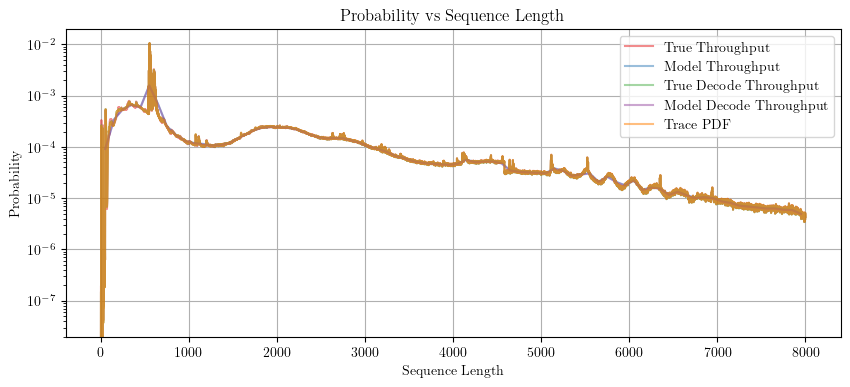

In [6]:
# plot distribution of throughput as a probability density function, and compare it to the trace PDF
plt.figure(figsize=(10, 4))
plt.plot(true_prefill_throughput_df["Sequence"], true_prefill_throughput_df["Throughput"] / true_prefill_throughput_df["Throughput"].sum(), label="True Throughput", alpha=0.5)
plt.plot(model_prefill_throughput_df["Sequence"], model_prefill_throughput_df["Throughput"] / true_prefill_throughput_df["Throughput"].sum() / bin_width, label="Model Throughput", alpha=0.5)
plt.plot(true_decode_throughput_df["Sequence"], true_decode_throughput_df["Throughput"] / true_decode_throughput_df["Throughput"].sum(), label="True Decode Throughput", alpha=0.5)
plt.plot(model_decode_throughput_df["Sequence"], model_decode_throughput_df["Throughput"] / true_decode_throughput_df["Throughput"].sum() / bin_width, label="Model Decode Throughput", alpha=0.5)
plt.plot(trace_df["Length"], trace_df["Probability"], label="Trace PDF", alpha=0.5)
plt.xlabel("Sequence Length")
plt.ylabel("Probability")
plt.title("Probability vs Sequence Length")
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

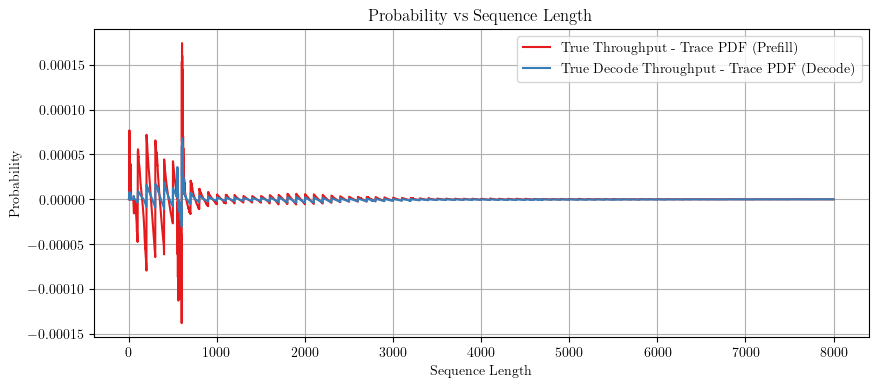

In [7]:
# plot the delta relative to the trace PDF
plt.figure(figsize=(10, 4))
plt.plot(true_prefill_throughput_df["Sequence"], (true_prefill_throughput_df["Throughput"] / true_prefill_throughput_df["Throughput"].sum()) - trace_df["Probability"], label="True Throughput - Trace PDF (Prefill)")
plt.plot(true_decode_throughput_df["Sequence"], (true_decode_throughput_df["Throughput"] / true_decode_throughput_df["Throughput"].sum()) - trace_df["Probability"], label="True Decode Throughput - Trace PDF (Decode)")
plt.xlabel("Sequence Length")
plt.ylabel("Probability")
plt.title("Probability vs Sequence Length")
plt.legend()
plt.grid()
plt.show()

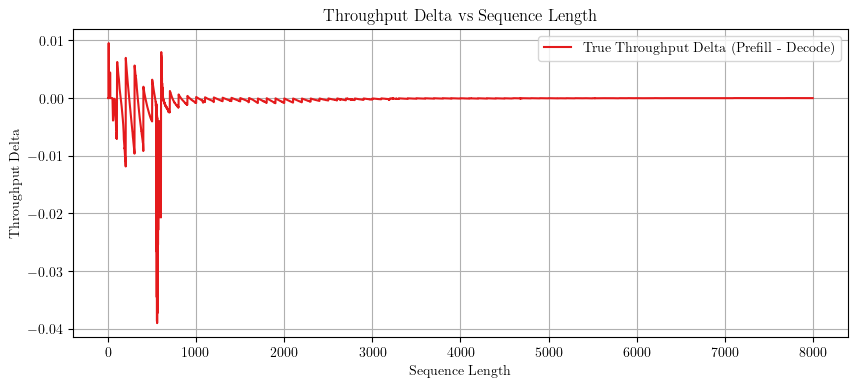

In [8]:
# plot the delta between prefill true and decode true
plt.figure(figsize=(10, 4))
plt.plot(true_prefill_throughput_df["Sequence"], true_prefill_throughput_df["Throughput"] - true_decode_throughput_df["Throughput"], label="True Throughput Delta (Prefill - Decode)")
plt.xlabel("Sequence Length")
plt.ylabel("Throughput Delta")
plt.title("Throughput Delta vs Sequence Length")
plt.legend()
plt.grid()
plt.show()

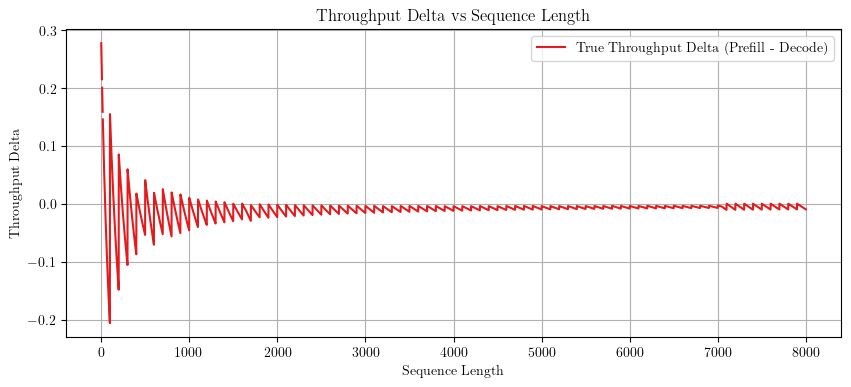

In [9]:
# plot the delta between prefill true and decode true (plot as a percentage)
plt.figure(figsize=(10, 4))
plt.plot(true_prefill_throughput_df["Sequence"], (true_prefill_throughput_df["Throughput"] - true_decode_throughput_df["Throughput"]) / true_decode_throughput_df["Throughput"], label="True Throughput Delta (Prefill - Decode)")
plt.xlabel("Sequence Length")
plt.ylabel("Throughput Delta")
plt.title("Throughput Delta vs Sequence Length")
plt.legend()
plt.grid()
plt.show()